<a href="https://colab.research.google.com/github/dauvannam321/CS114.M21.N02/blob/main/Project%20(gradient%20vanishing%20in%20MLP)/Hint/%5Bhint%5DSolution1b_WeightIncreasing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [ ]:
# fashion_mnist
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Reshape Data

In [ ]:
X_train = X_train.reshape(60000, -1)
X_test  = X_test.reshape(10000, -1)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


## Weight Increasing (std=10)

In [ ]:
# solution 1: increase weight value

#################### YOUR CODE HERE ####################
initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=10.0)

In [ ]:
# Đặt initializer ở trên vào các layer có ký hiệu kernel_initializer=initializer
model = keras.Sequential()
model.add(keras.Input(shape=(784,)))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(128, activation='sigmoid',
                             kernel_initializer=initializer))
model.add(keras.layers.Dense(10))
########################################################


# optimizer and loss
model.compile(optimizer=keras.optimizers.SGD(), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

# training
batch_size = 512
history = model.fit(X_train, y_train, batch_size,
                    validation_data=(X_test, y_test),
                    epochs=300, verbose=2)

Epoch 1/300
118/118 - 7s - loss: 2.4000 - accuracy: 0.1007 - val_loss: 2.3704 - val_accuracy: 0.0998 - 7s/epoch - 57ms/step
Epoch 2/300
118/118 - 1s - loss: 2.3498 - accuracy: 0.1050 - val_loss: 2.3409 - val_accuracy: 0.1085 - 881ms/epoch - 7ms/step
Epoch 3/300
118/118 - 1s - loss: 2.3359 - accuracy: 0.1126 - val_loss: 2.3393 - val_accuracy: 0.1114 - 655ms/epoch - 6ms/step
Epoch 4/300
118/118 - 0s - loss: 2.3290 - accuracy: 0.1155 - val_loss: 2.3266 - val_accuracy: 0.1164 - 456ms/epoch - 4ms/step
Epoch 5/300
118/118 - 0s - loss: 2.3242 - accuracy: 0.1165 - val_loss: 2.3145 - val_accuracy: 0.1186 - 475ms/epoch - 4ms/step
Epoch 6/300
118/118 - 0s - loss: 2.3119 - accuracy: 0.1231 - val_loss: 2.3096 - val_accuracy: 0.1237 - 485ms/epoch - 4ms/step
Epoch 7/300
118/118 - 0s - loss: 2.3027 - accuracy: 0.1294 - val_loss: 2.3006 - val_accuracy: 0.1282 - 452ms/epoch - 4ms/step
Epoch 8/300
118/118 - 0s - loss: 2.2977 - accuracy: 0.1309 - val_loss: 2.2998 - val_accuracy: 0.1314 - 447ms/epoch - 4ms

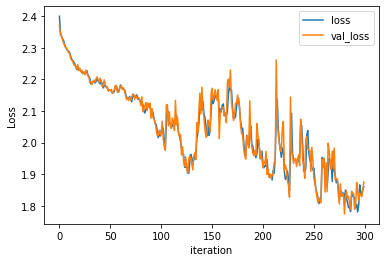

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.legend()

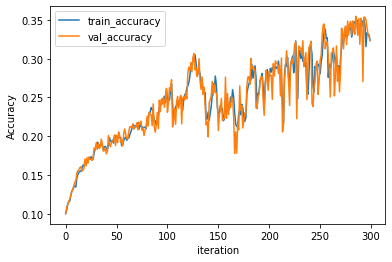

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.legend()